In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read the data into a dataframe
mushroom_data = pd.read_csv("./resources/mushrooms.csv")


In [3]:
# Check the dimensions and attr of the df
print(mushroom_data.shape)


(8124, 23)


In [4]:
print(mushroom_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# Check the overall distribution of the features
print(mushroom_data.describe())


       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [6]:
# Split the classes
edible_shrooms = mushroom_data[mushroom_data["class"] == "e"]
pois_shrooms = mushroom_data[mushroom_data["class"] == "p"]


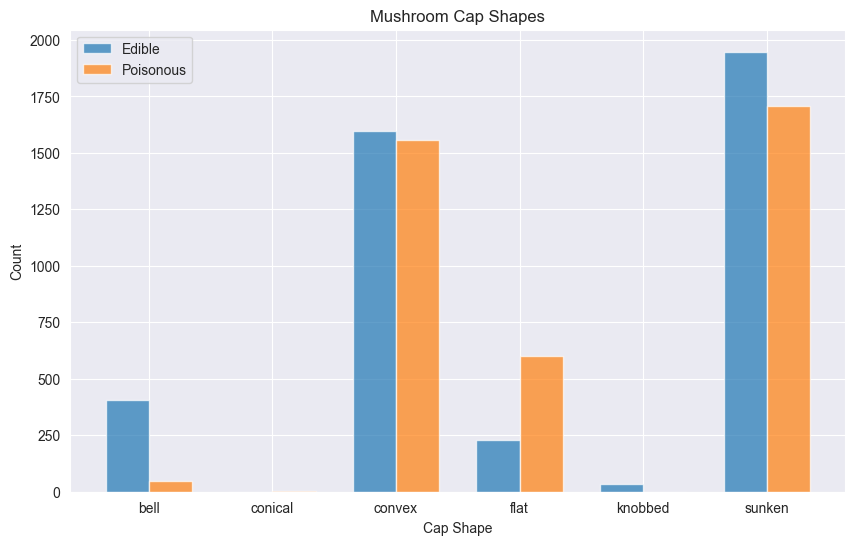

In [7]:
# Check the effect of the cap shape on the class
shapes = {
    'b': 'bell',
    'c': 'conical',
    'x': 'convex',
    'f': 'flat',
    'k': 'knobbed',
    's': 'sunken'
}

# Initialize counts for all possible shapes
edible_values = []
pois_values = []

# Get counts for each shape in order
for shape_code in sorted(shapes.keys()):
    edible_count = len(edible_shrooms[edible_shrooms['cap-shape'] == shape_code])
    pois_count = len(pois_shrooms[pois_shrooms['cap-shape'] == shape_code])
    edible_values.append(edible_count)
    pois_values.append(pois_count)

# Set the width of each bar and positions of the bars
width = 0.35
x = np.arange(len(shapes))

# Create simple bar plot with offset
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, edible_values, width, label='Edible', alpha=0.7)
plt.bar(x + width/2, pois_values, width, label='Poisonous', alpha=0.7)

# Customize the plot
plt.title('Mushroom Cap Shapes')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.xticks(x, list(shapes.values()))
plt.legend()


Now, use the `MushroomUtils` class to get the labeled data and plot a pairplot.
Since we want to classify the mushrooms as either edible or poisonous, we will use the `class` column as the label.
Also, note that get_labeled_data() uses the LabelEncoder to encode the labels.
It is useful for the tree-based models, but not for the regression models.

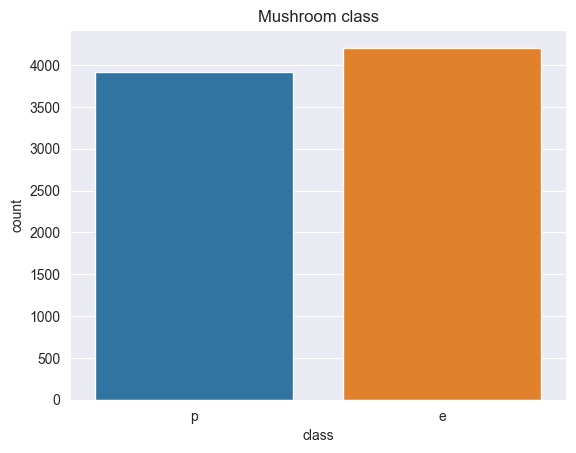

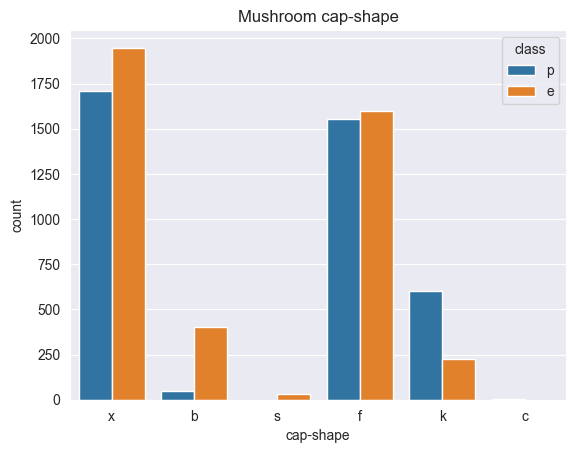

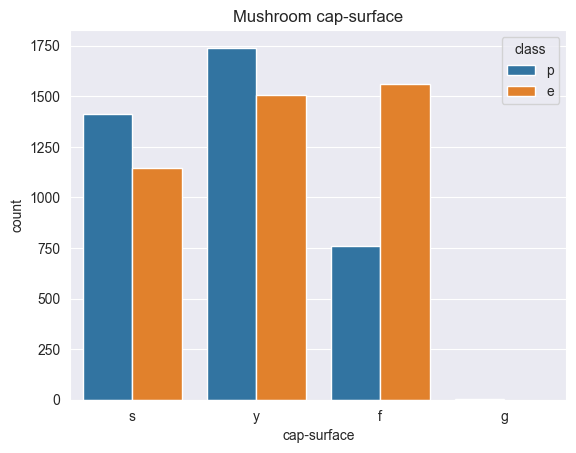

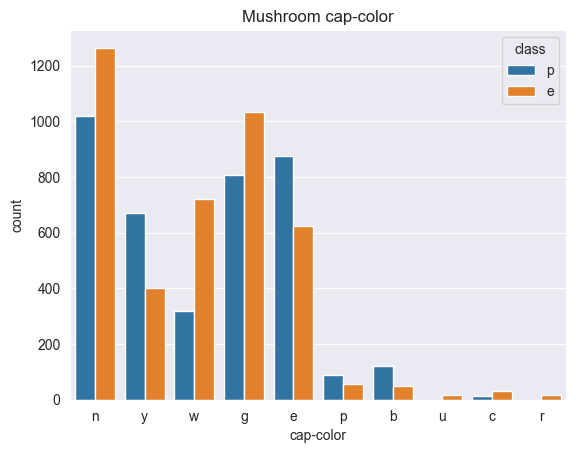

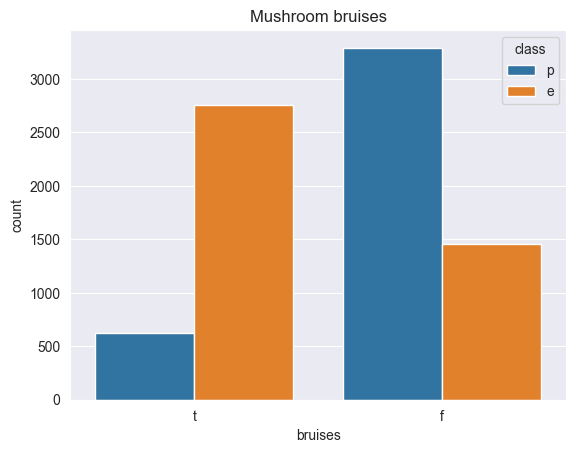

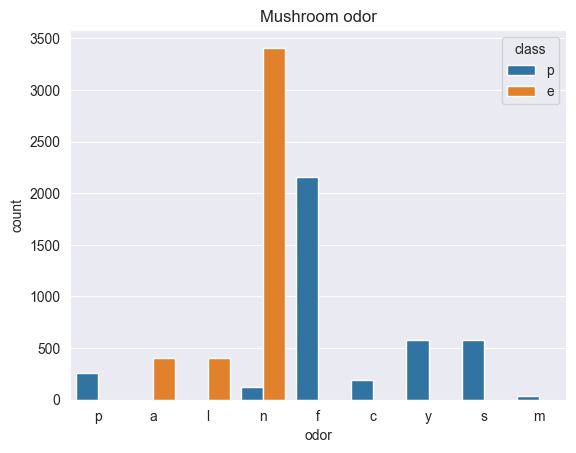

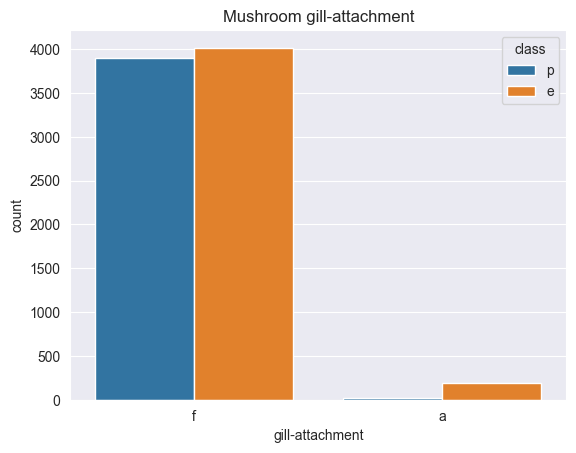

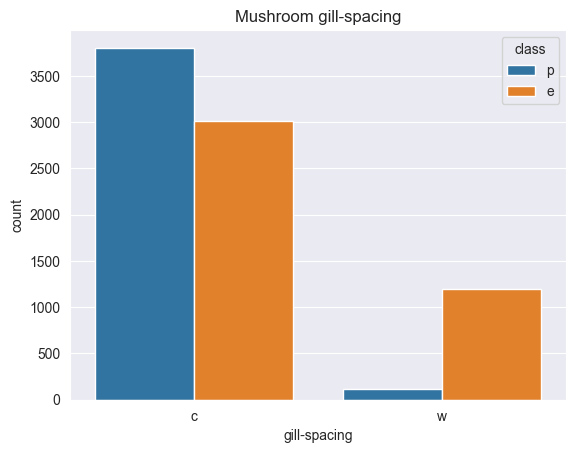

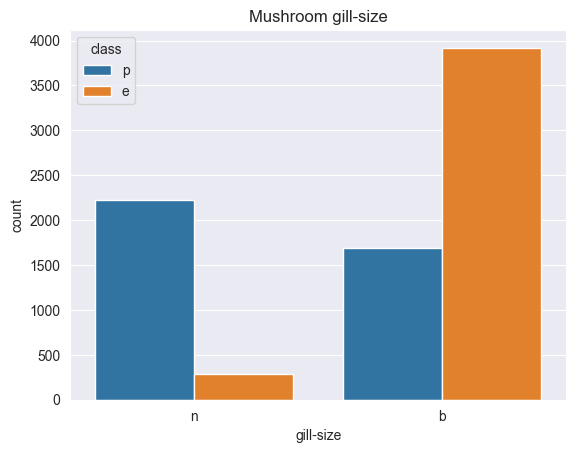

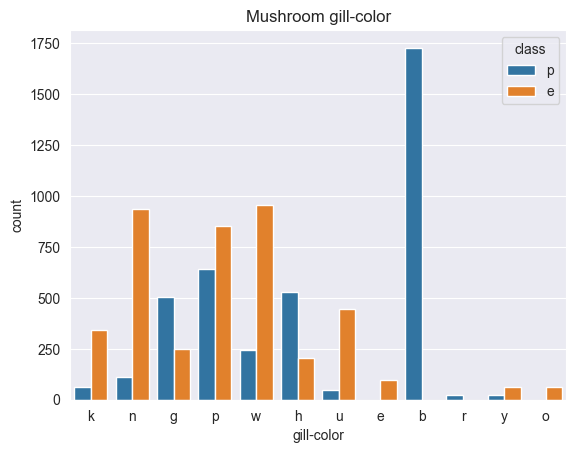

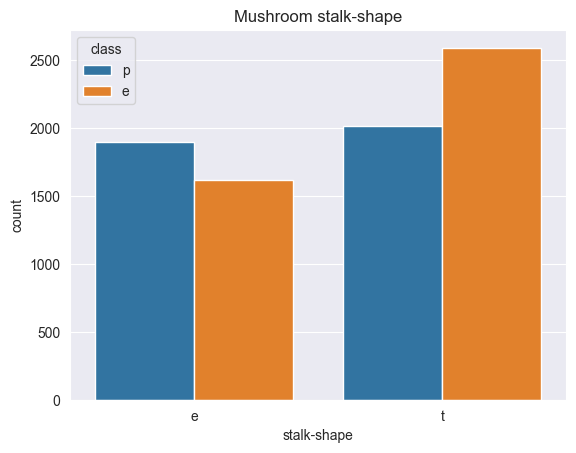

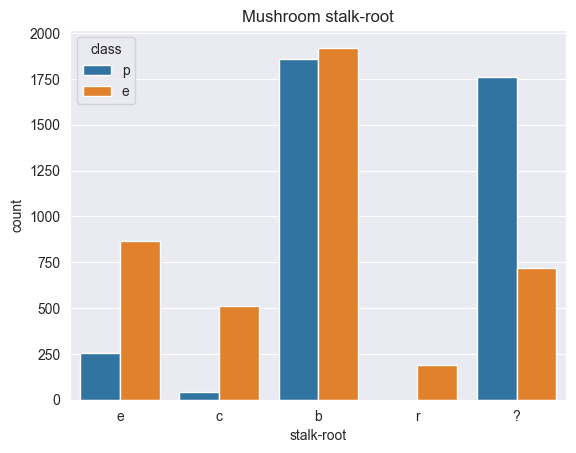

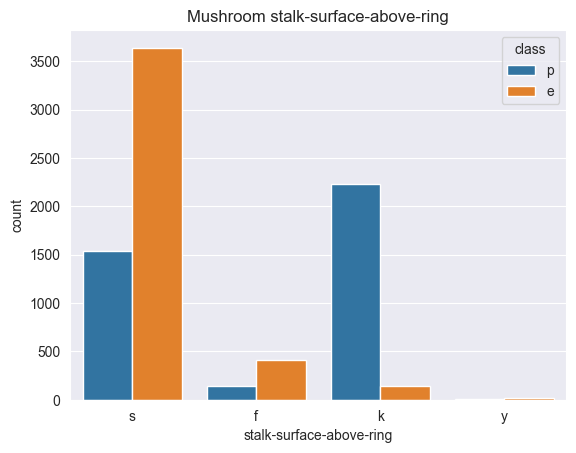

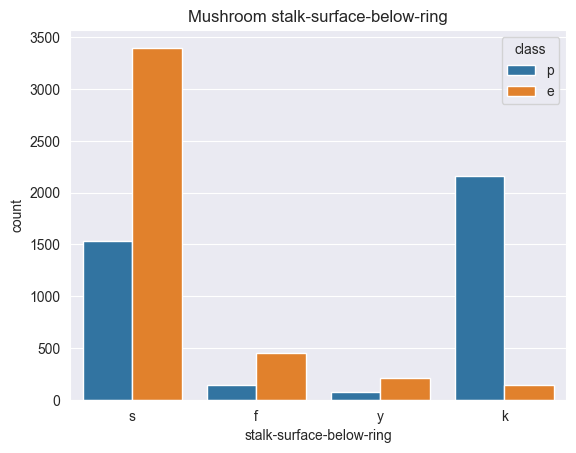

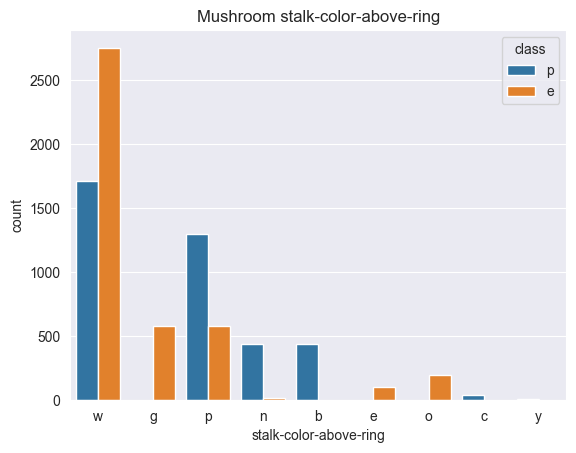

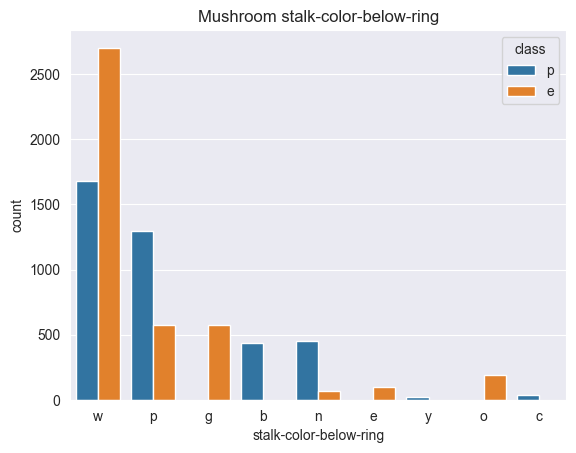

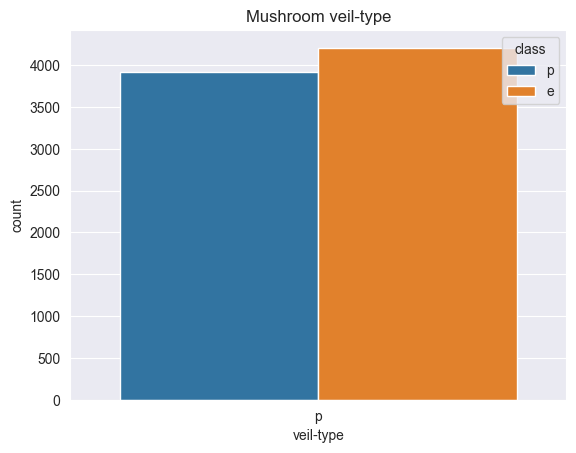

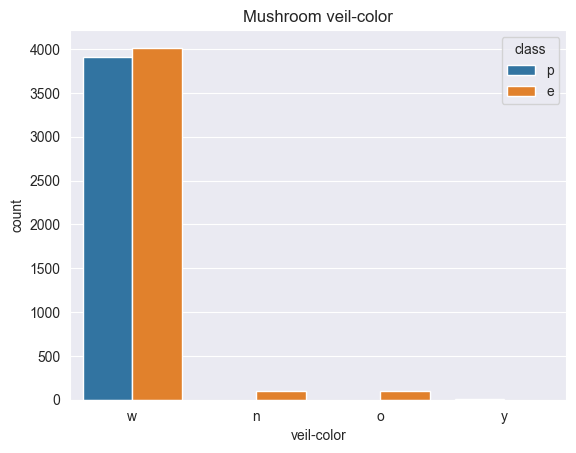

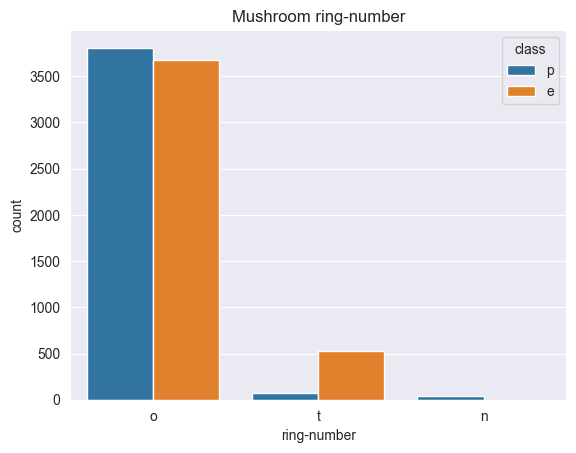

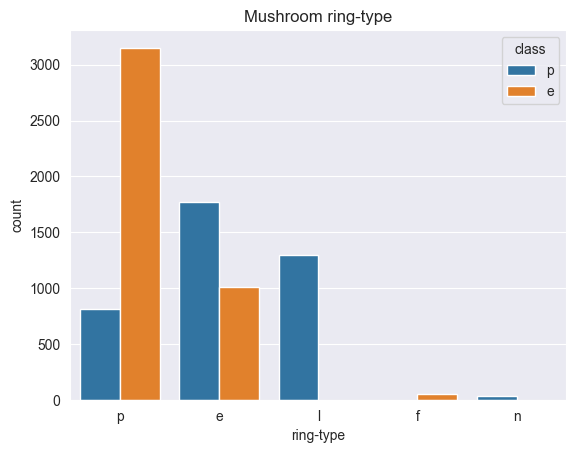

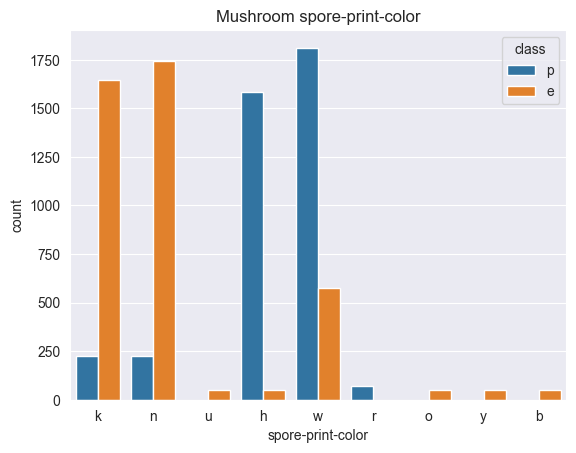

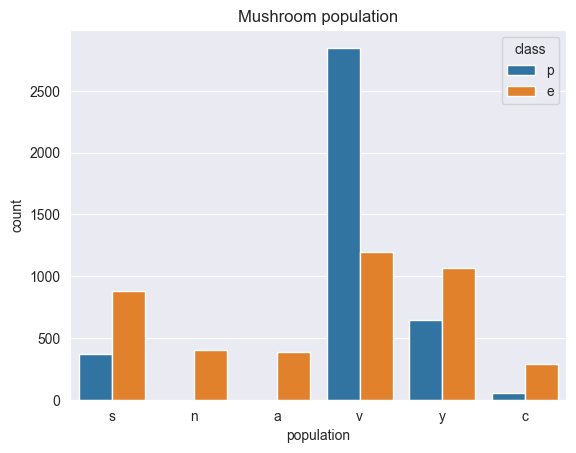

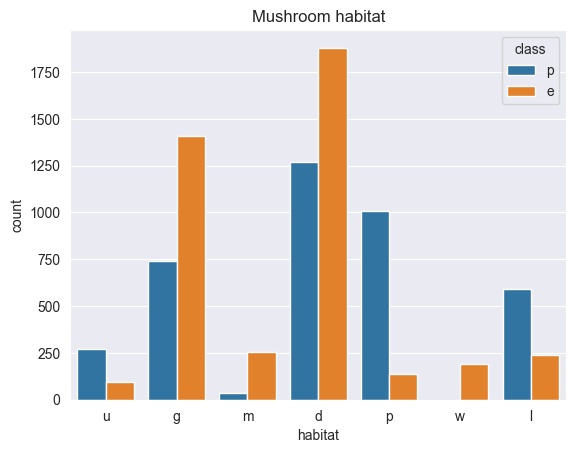

In [8]:
import seaborn as sns

# Plot a countplot for each feature, observe the distribution of the classes
for col in mushroom_data.columns:
    sns.countplot(data=mushroom_data, x=col, hue='class')
    plt.title(f'Mushroom {col}')
    plt.show()


In [9]:
# Get the labeled data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

labeled_shroom_data = mushroom_data.apply(label_encoder.fit_transform)

labeled_shroom_data.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [10]:
# Conduct a chi-squared test to see the feature's association with the class
from sklearn.feature_selection import chi2

x = labeled_shroom_data.drop('class', axis=1)
y = labeled_shroom_data['class']

chi2_scores, p_values = chi2(x, y)

# Create a dataframe to display the results
chi2_df = pd.DataFrame({
    'Feature': x.columns,
    'Chi2 Score': chi2_scores,
    'P-Value': p_values
})

chi2_df.sort_values(by='Chi2 Score', ascending=False)

print(chi2_df)


                     Feature   Chi2 Score        P-Value
0                  cap-shape    17.508364   2.860465e-05
1                cap-surface   214.068544   1.779362e-48
2                  cap-color    11.511382   6.917135e-04
3                    bruises  1194.277352  1.069037e-261
4                       odor    75.910163   2.968682e-18
5            gill-attachment     3.505447   6.116734e-02
6               gill-spacing   826.795274  8.061293e-182
7                  gill-size  1636.606833   0.000000e+00
8                 gill-color  5957.764469   0.000000e+00
9                stalk-shape    36.594105   1.454709e-09
10                stalk-root  1186.029221  6.630617e-260
11  stalk-surface-above-ring   222.982400   2.022392e-50
12  stalk-surface-below-ring   206.648180   7.398869e-47
13    stalk-color-above-ring   119.792216   7.024638e-28
14    stalk-color-below-ring   109.789410   1.089740e-25
15                 veil-type          NaN            NaN
16                veil-color   

The chi-squared test results show that the `gill-color` feature has the highest association with the class.
`bruises`, `gill-size`, `ring-type`, and `stalk-root` also have a significant association with the class.

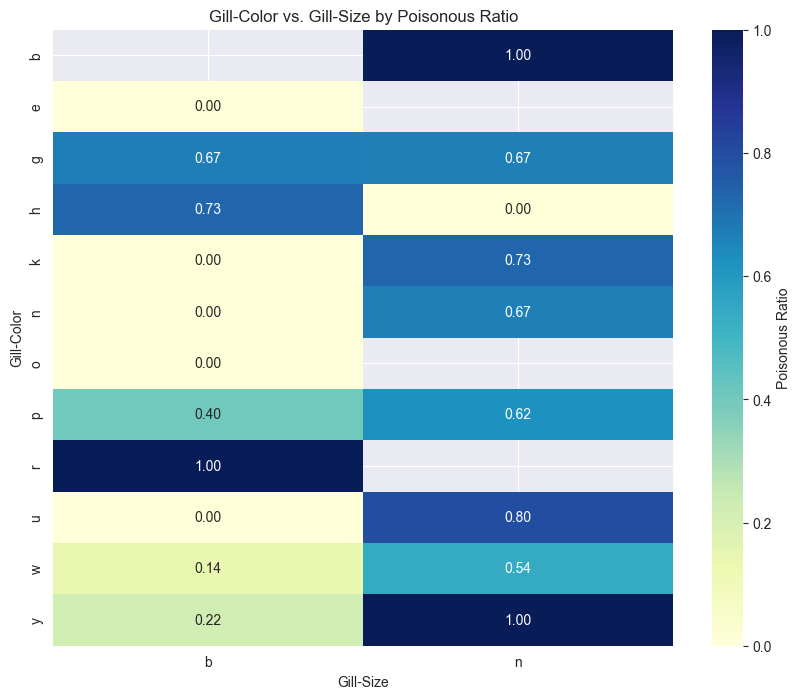

In [11]:
# Crosstab for gill-color and gill-size
interaction = pd.crosstab(index=mushroom_data['gill-color'], 
                          columns=mushroom_data['gill-size'], 
                          values=mushroom_data['class'].apply(lambda x: 1 if x == 'p' else 0), 
                          aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(interaction, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Poisonous Ratio'})
plt.title("Gill-Color vs. Gill-Size by Poisonous Ratio")
plt.xlabel("Gill-Size")
plt.ylabel("Gill-Color")
plt.show()


The heatmap shows that the broad gill-size with green gill-color has a high poisonous ratio.

Also, the narrow gill-size with buff gill-color has a low poisonous ratio.

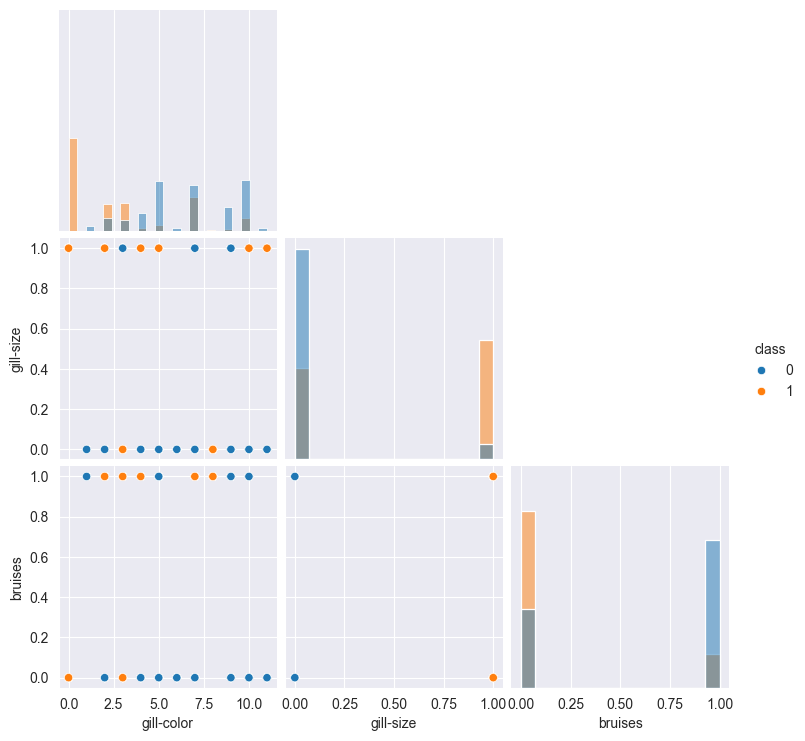

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode only key features
encoded_data = mushroom_data[['gill-color', 'gill-size', 'bruises', 'class']].apply(LabelEncoder().fit_transform)

# Pairplot
sns.pairplot(encoded_data, hue='class', diag_kind='hist', corner=True)


The pairplot will allow us to come up with combinations of features that can help classify the mushrooms.

For example, the `gill-color` and `gill-size` features show a clear distinction between the classes.

In [13]:
# Create a new feature by combining gill-color and gill-size
mushroom_data["gill_combined"] = mushroom_data["gill-color"] + "_" + mushroom_data["gill-size"]

mushroom_data["gill_combined"]


0       k_n
1       k_b
2       n_b
3       n_n
4       k_b
       ... 
8119    y_b
8120    y_b
8121    n_b
8122    b_n
8123    y_b
Name: gill_combined, Length: 8124, dtype: object

Text(0.5, 1.0, 'Gill-Combined Feature')

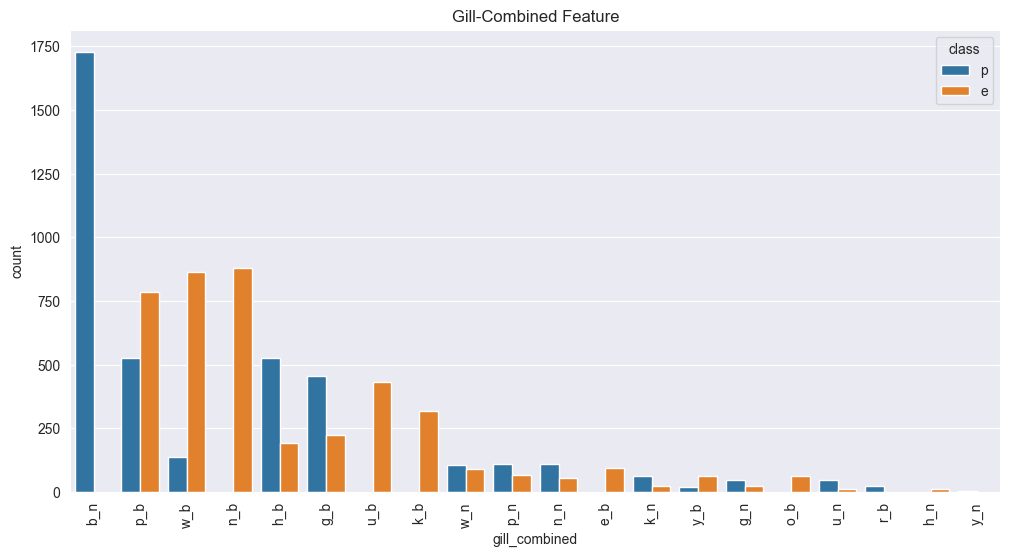

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=mushroom_data, x='gill_combined', hue='class',
              order=mushroom_data['gill_combined'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Gill-Combined Feature")


In [15]:
label_encoder = LabelEncoder()
encoded_mush_data = mushroom_data.apply(label_encoder.fit_transform)  # Ensure all categorical data is encoded

chi2_scores, p_values = chi2(encoded_mush_data[['gill_combined']], encoded_mush_data['class'])
feature_importance = pd.DataFrame({'Feature': ['gill_combined'], 'Chi2 Score': chi2_scores, 'P-Value': p_values})
print(feature_importance)


         Feature   Chi2 Score  P-Value
0  gill_combined  9803.031012      0.0


The new feature `gill_combined` has a high association with the class, as shown by the chi-squared test results.

We can further explore the data but since it is already known to be clean, we can proceed to model building. 